In [1]:
%reload_ext autoreload
%autoreload 2

import chess
from models.move_evaluation import SentimateNet
import numpy as np
from playing.testing import *
from playing.agents import RandomAgent, MinimaxAgent
import torch
import more_itertools
import cProfile

In [15]:
def test(arr):
    arr[0] = 0

x = np.array([[1,2],[3,4]])

test(x[0])

x

array([[0, 2],
       [3, 4]])

In [2]:
model = SentimateNet()
model.load_state_dict(torch.load("../models/Sentimate-7.11-new-representation/best.model"))
model.to(torch.float16)

SentimateNet(
  (conv_layers): Sequential(
    (0): Conv2d(26, 26, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): Dropout(p=0.25, inplace=False)
    (2): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (fc_layers): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1664, out_features=500, bias=True)
    (2): ELU(alpha=1.0)
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=500, out_features=200, bias=True)
    (5): ELU(alpha=1.0)
    (6): Dropout(p=0.25, inplace=False)
    (7): Linear(in_features=200, out_features=1, bias=True)
  )
)

In [3]:
agent = MinimaxAgent(model, 3, min_coef=1, decay=0.8)
test_agent(agent, n_games=100)

#model: 94   draw: 0   random: 6

100%|██████████| 100/100 [5:22:46<00:00, 193.67s/it] 


{'model_better': 94, 'random_better': 6, 'draw': 0}

In [5]:
test_agent(MinimaxAgent(model, 1, min_coef=1, decay=0.8), n_games=100)

#model: 90  draw: 1  random: 9

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


{'model_better': 90, 'random_better': 9, 'draw': 1}

In [6]:
test_agent(MinimaxAgent(model, 2, min_coef=1, decay=0.8), n_games=100)

#model: 89  draw: 0  random: 11

100%|██████████| 100/100 [12:04<00:00,  7.25s/it]


{'model_better': 89, 'random_better': 11, 'draw': 0}

In [14]:
test_agent(MinimaxAgent(model, 2, min_coef=1, decay=0.8), n_games=100)

#model: 89  draw: 0  random: 11

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [11:51<00:00,  7.11s/it]


{'model_better': 87, 'random_better': 12, 'draw': 1}

In [11]:
board = chess.Board()

# Create a cProfile object
profiler = cProfile.Profile()

# Enable profiling
profiler.enable()

# Call your function/code that you want to profile
agent.play(board)

# Disable profiling
profiler.disable()

# Print the profiling results
profiler.print_stats(sort='time')

         9561750 function calls (9554631 primitive calls) in 25.815 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1193216    3.653    0.000    5.990    0.000 __init__.py:683(piece_at)
    18644    3.561    0.000   14.839    0.001 __init__.py:937(board_fen)
     9322    2.923    0.000   24.846    0.003 board_representation_2.py:110(get_chess_representation_from_fen)
   596574    1.806    0.000    4.261    0.000 __init__.py:460(symbol)
  1224917    1.620    0.000    1.620    0.000 __init__.py:693(piece_type_at)
   596574    1.435    0.000    2.114    0.000 __init__.py:60(piece_symbol)
   970812    1.109    0.000    1.109    0.000 {method 'append' of 'list' objects}
   931726    1.059    0.000    1.059    0.000 {method 'upper' of 'str' objects}
   745034    0.849    0.000    0.849    0.000 {method 'isdigit' of 'str' objects}
    18644    0.729    0.000    2.774    0.000 __init__.py:2334(castling_xfen)
   596574    0.679   

In [12]:
agent.play(board)

Move.from_uci('d2d4')

In [20]:
agent.play(board)

Move.from_uci('d2d4')

In [50]:
type(board.pieces(chess.KING, chess.BLACK))

chess.SquareSet

In [21]:
test_agent(agent)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [06:34<00:00,  7.90s/it]


{'model_better': 48, 'random_better': 1, 'draw': 1}

In [77]:
%timeit agent.eval_legal_moves(board)

5.09 ms ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
test_agent(agent, n_games=100)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [13:28<00:00,  8.08s/it]


{'model_better': 97, 'random_better': 2, 'draw': 1}

In [29]:
test_agent(agent, n_games=100)

100%|██████████| 100/100 [13:30<00:00,  8.10s/it]


{'model_better': 94, 'random_better': 5, 'draw': 1}

In [24]:
agent_2 = MinimaxAgent(model, 2, min_coef=1)
test_agent(agent_2, n_games=100)

100%|██████████| 100/100 [13:40<00:00,  8.21s/it]


{'model_better': 92, 'random_better': 7, 'draw': 1}

In [30]:
test_agent(agent_2, n_games=100)

100%|██████████| 100/100 [15:11<00:00,  9.12s/it]


{'model_better': 80, 'random_better': 17, 'draw': 3}

In [25]:
model_2 = torch.nn.Sequential(
    model,
    nn.Sigmoid()
)
model_2

Sequential(
  (0): SentimateNet(
    (conv_layers): Sequential(
      (0): Conv2d(26, 26, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): Dropout(p=0.25, inplace=False)
      (2): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (3): Flatten(start_dim=1, end_dim=-1)
    )
    (fc_layers): Sequential(
      (0): Dropout(p=0.25, inplace=False)
      (1): Linear(in_features=1664, out_features=500, bias=True)
      (2): ELU(alpha=1.0)
      (3): Dropout(p=0.25, inplace=False)
      (4): Linear(in_features=500, out_features=200, bias=True)
      (5): ELU(alpha=1.0)
      (6): Dropout(p=0.25, inplace=False)
      (7): Linear(in_features=200, out_features=1, bias=True)
    )
  )
  (1): Sigmoid()
)

In [28]:
agent_3 = MinimaxAgent(model_2, 2, min_coef=0.5)
test_agent(agent_3, n_games=100)

100%|██████████| 100/100 [16:56<00:00, 10.16s/it]


{'model_better': 73, 'random_better': 25, 'draw': 2}

In [55]:
batch_moves = agent.batch_legal_moves(board).cuda()
legal_moves = np.array(list(board.legal_moves))


with torch.inference_mode():
    out = model(batch_moves).flatten()
    print(out)
    arg_sort = torch.argsort(out, descending=True)
    print(out[arg_sort])
    print(arg_sort)
    for i in arg_sort:
        print(legal_moves[i])

    print(legal_moves[arg_sort.cpu().numpy()])

tensor([-3.4355,  0.2491, -2.4668, -4.4844, -3.7305, -1.6816, -4.0625, -2.5605,
        -3.2969, -2.9688, -1.7754, -3.1953, -3.0156, -2.6465, -1.0273,  1.2949,
         1.1973,  0.3660, -1.9238, -3.9902], device='cuda:0',
       dtype=torch.float16)
tensor([ 1.2949,  1.1973,  0.3660,  0.2491, -1.0273, -1.6816, -1.7754, -1.9238,
        -2.4668, -2.5605, -2.6465, -2.9688, -3.0156, -3.1953, -3.2969, -3.4355,
        -3.7305, -3.9902, -4.0625, -4.4844], device='cuda:0',
       dtype=torch.float16)
tensor([15, 16, 17,  1, 14,  5, 10, 18,  2,  7, 13,  9, 12, 11,  8,  0,  4, 19,
         6,  3], device='cuda:0')
e2e4
d2d4
c2c4
g1f3
f2f4
g2g3
b2b3
b2b4
b1c3
e2e3
g2g4
c2c3
h2h4
a2a3
d2d3
g1h3
h2h3
a2a4
f2f3
b1a3
[Move.from_uci('e2e4') Move.from_uci('d2d4') Move.from_uci('c2c4')
 Move.from_uci('g1f3') Move.from_uci('f2f4') Move.from_uci('g2g3')
 Move.from_uci('b2b3') Move.from_uci('b2b4') Move.from_uci('b1c3')
 Move.from_uci('e2e3') Move.from_uci('g2g4') Move.from_uci('c2c3')
 Move.from_uci('h2

In [7]:
def test_1(board: chess.Board):
    for move in board.legal_moves:
        board.push(move)
        board.pop()

def test_2(board: chess.Board):
    for move in board.legal_moves:
        bc = board.copy()
        bc.push(move)

def test_3(board: chess.Board):
    for move in board.legal_moves:
        bc = chess.Board(board.fen())
        bc.push(move)

In [8]:
%timeit test_1(board)

163 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
%timeit test_2(board)

224 µs ± 5.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%timeit test_3(board)

1.19 ms ± 8.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%timeit bc = board.copy()

2.71 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [89]:
model.eval()

SentimateNet(
  (conv_layers): Sequential(
    (0): Conv2d(26, 26, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): Dropout(p=0.25, inplace=False)
    (2): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (fc_layers): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1664, out_features=500, bias=True)
    (2): ELU(alpha=1.0)
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=500, out_features=200, bias=True)
    (5): ELU(alpha=1.0)
    (6): Dropout(p=0.25, inplace=False)
    (7): Linear(in_features=200, out_features=1, bias=True)
  )
)

In [90]:
agent = MinimaxAgent(model, 1, min_coef=1)

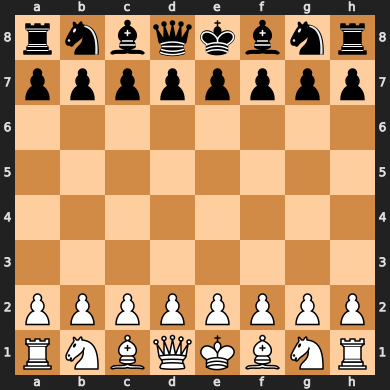

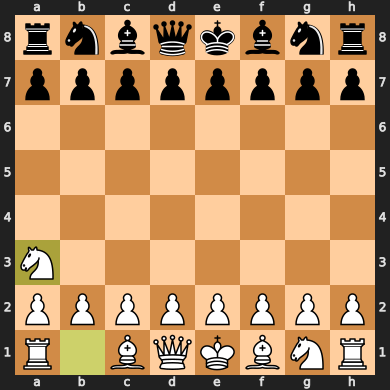

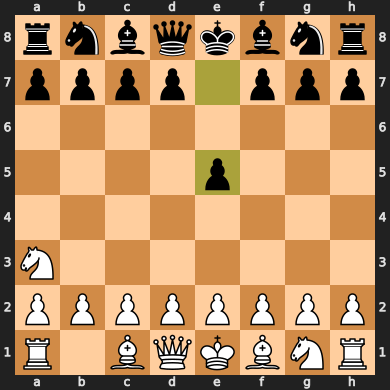

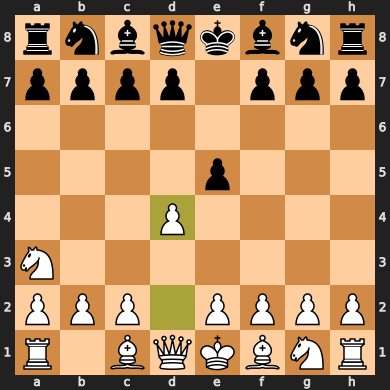

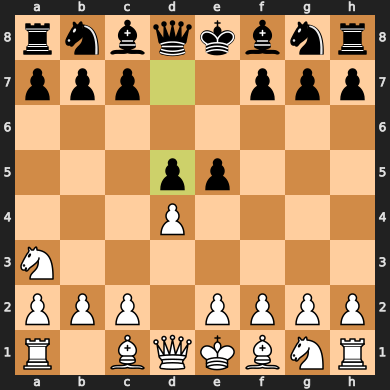

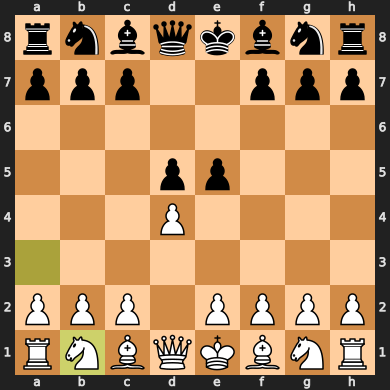

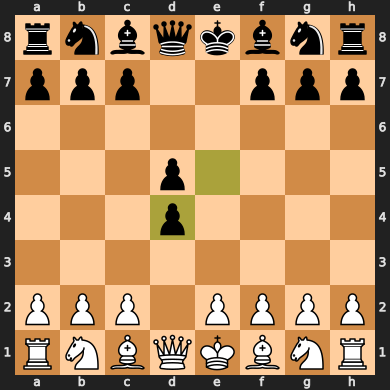

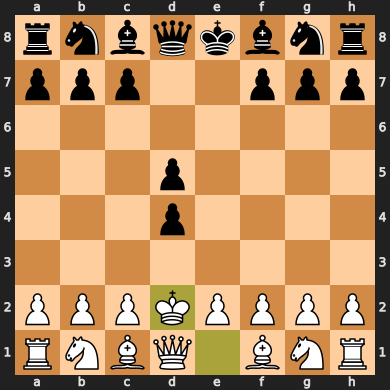

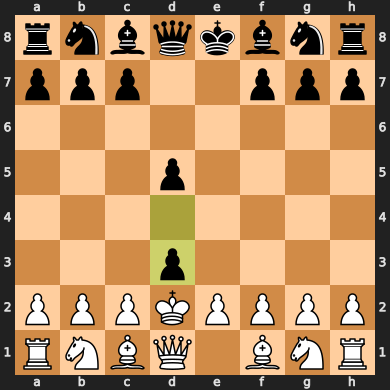

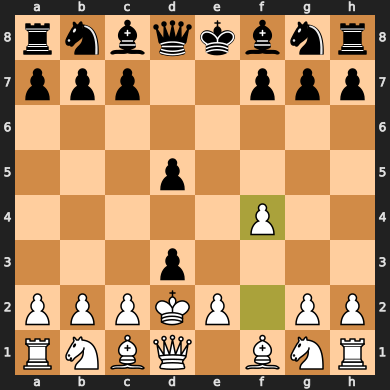

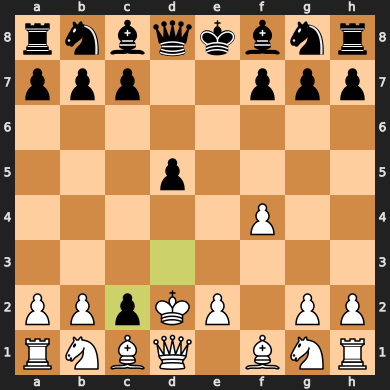

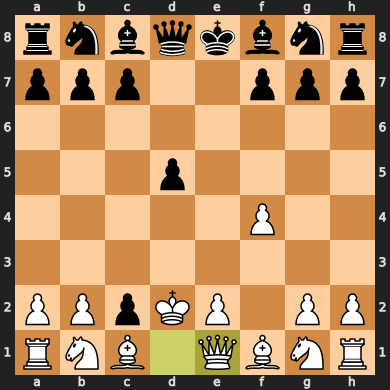

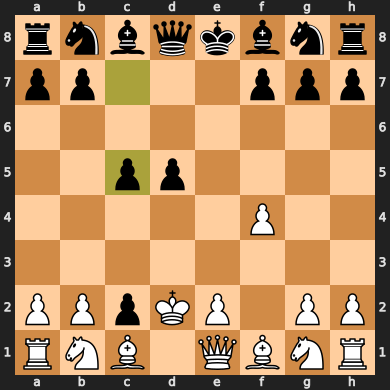

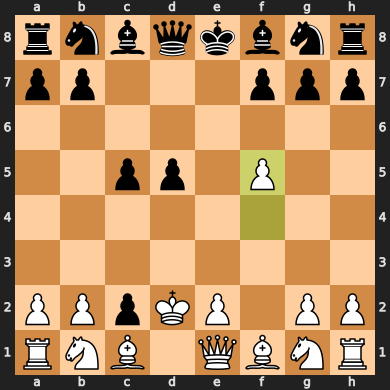

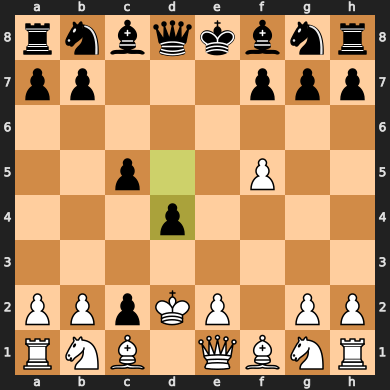

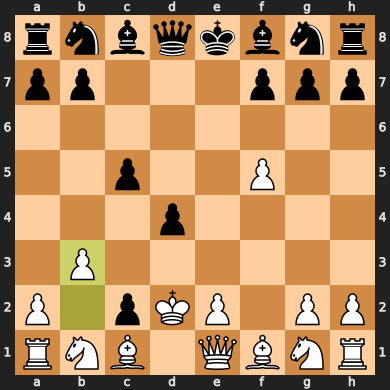

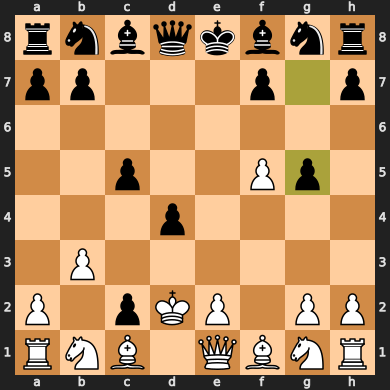

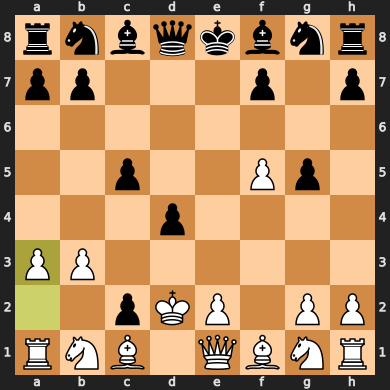

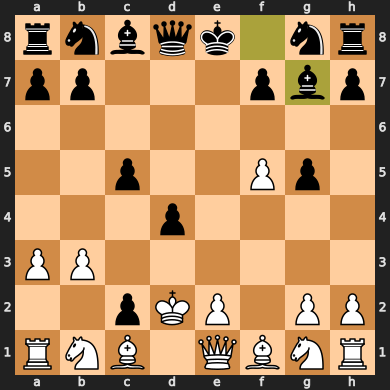

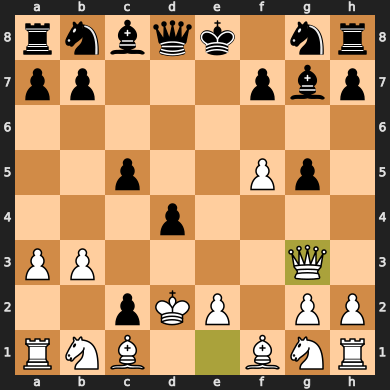

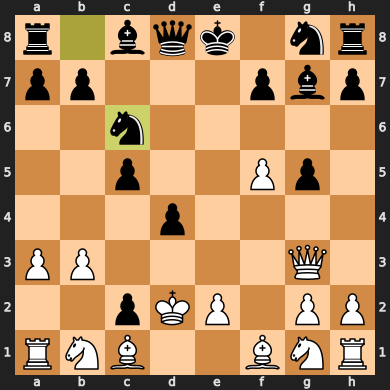

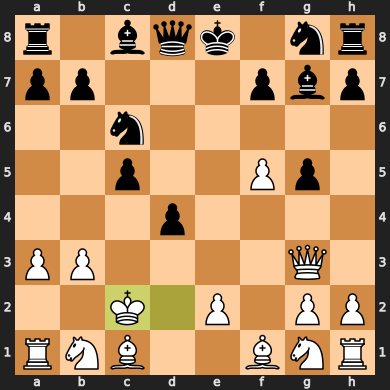

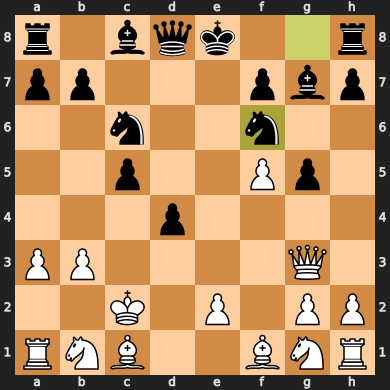

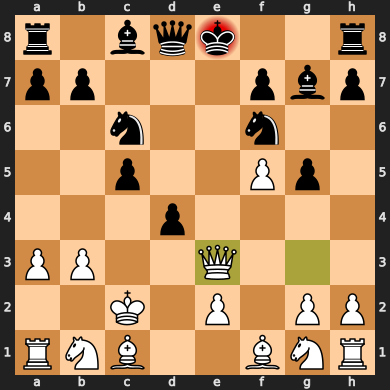

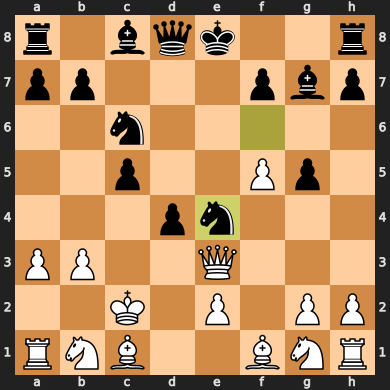

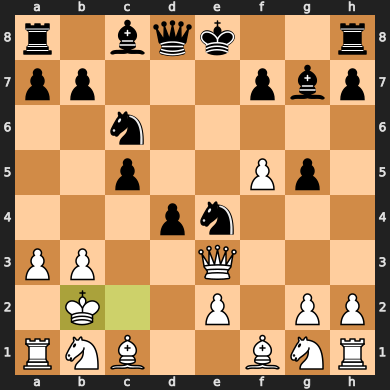

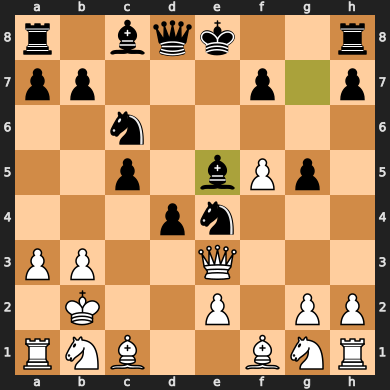

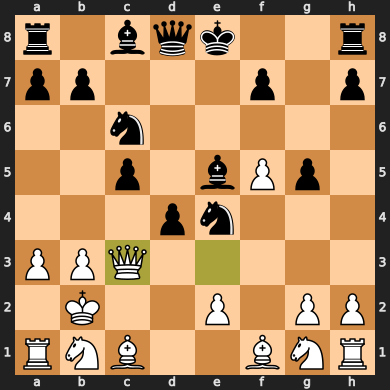

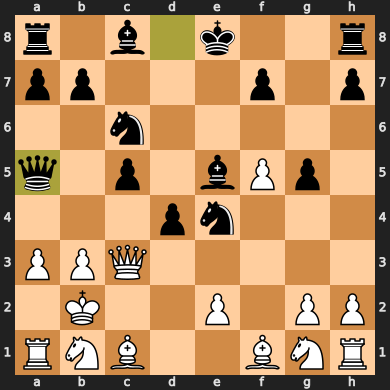

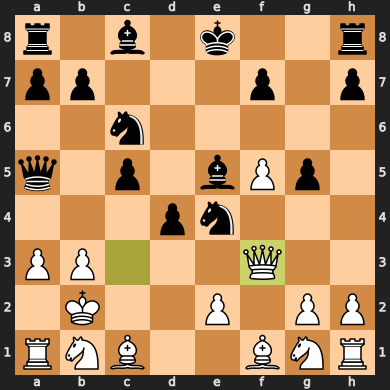

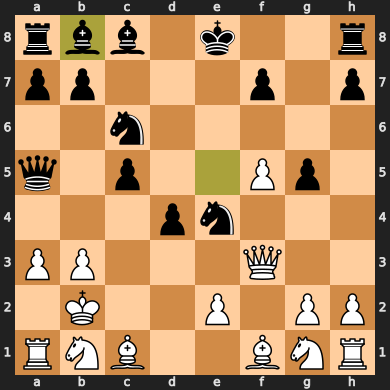

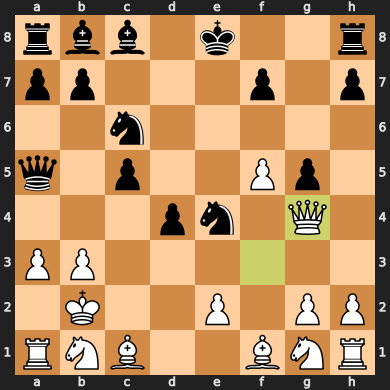

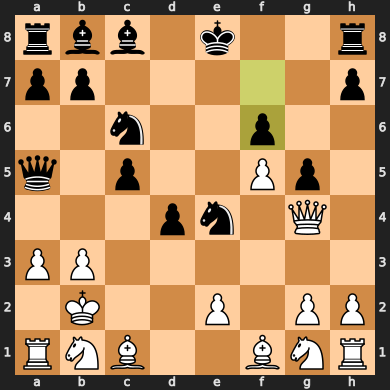

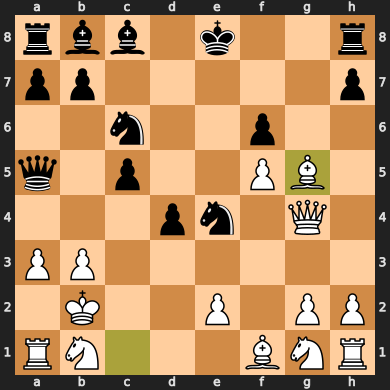

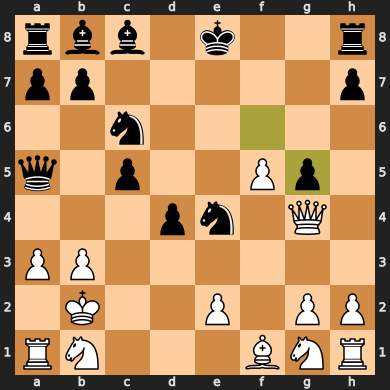

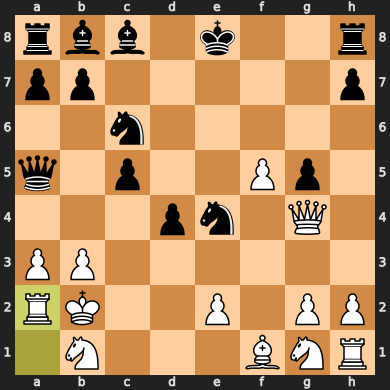

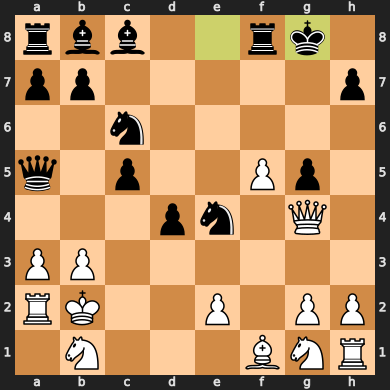

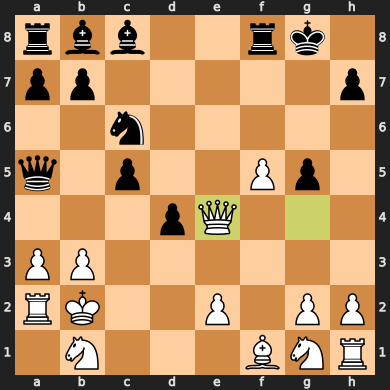

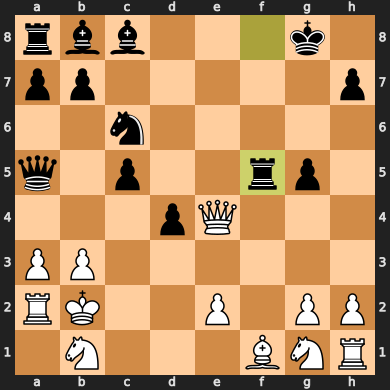

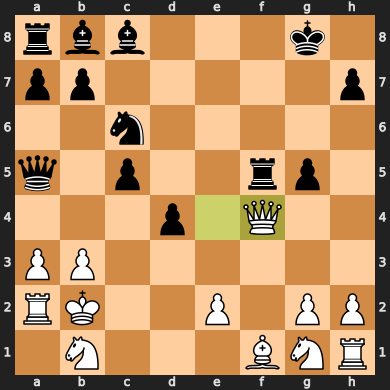

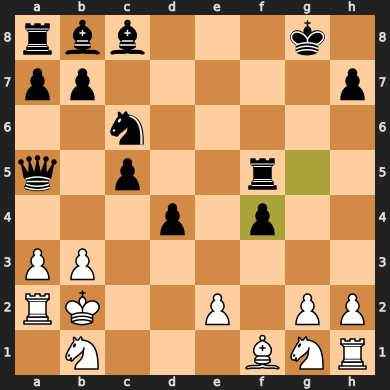

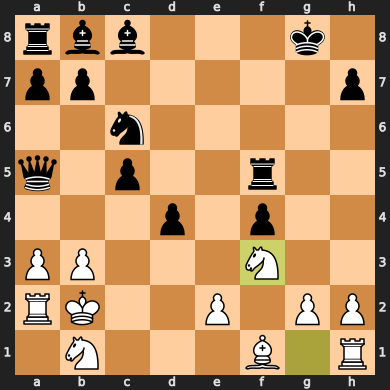

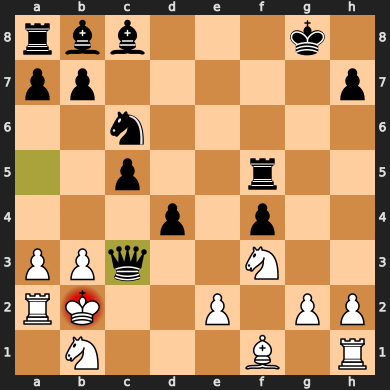

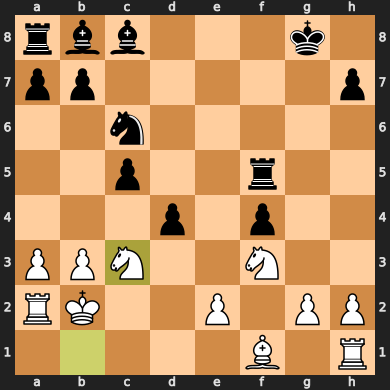

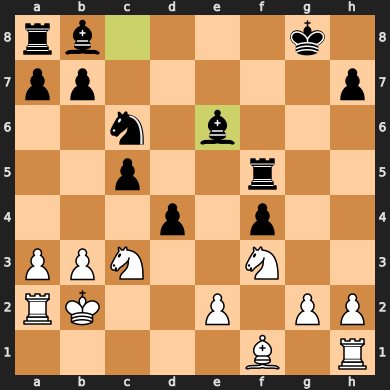

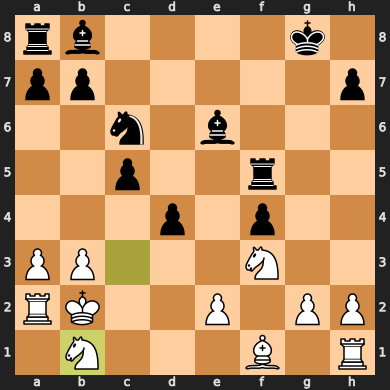

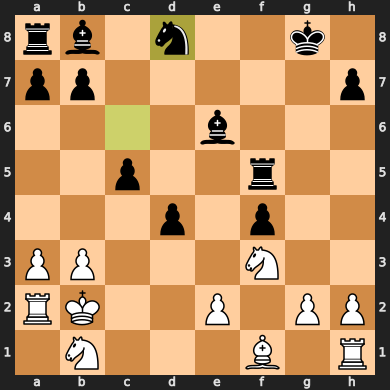

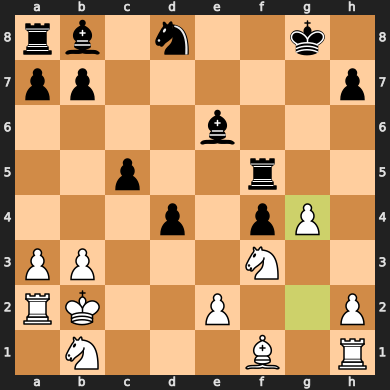

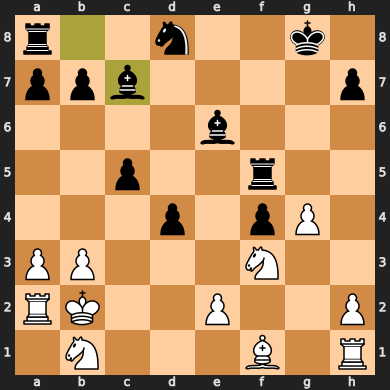

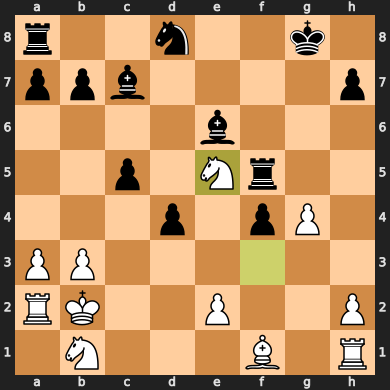

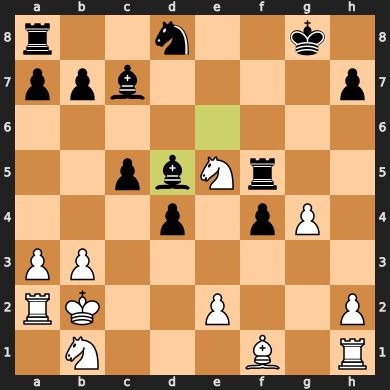

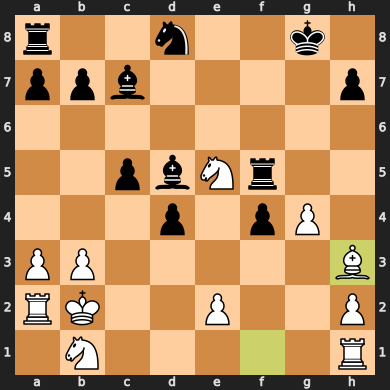

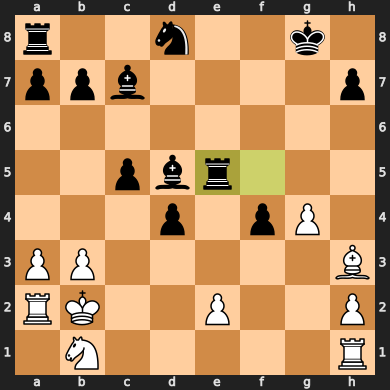

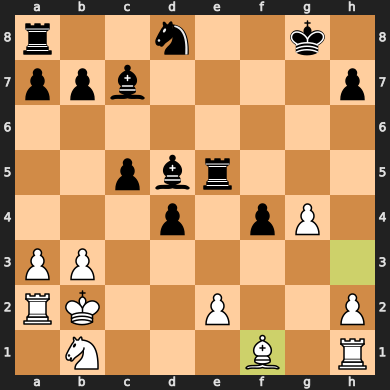

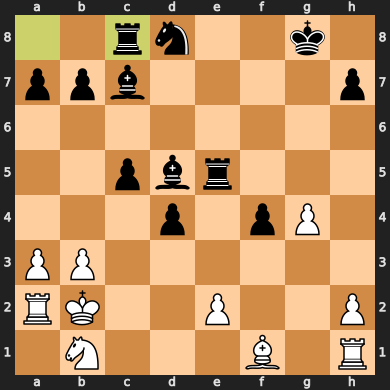

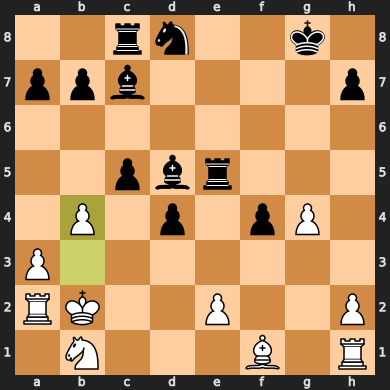

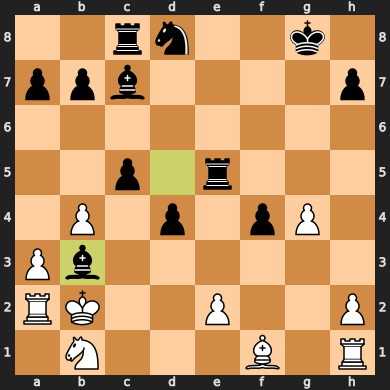

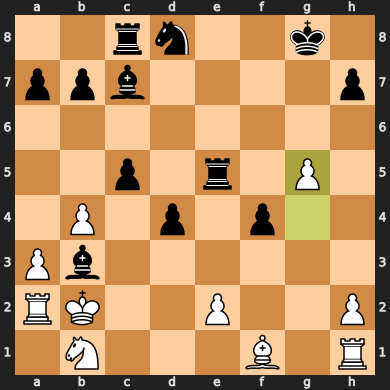

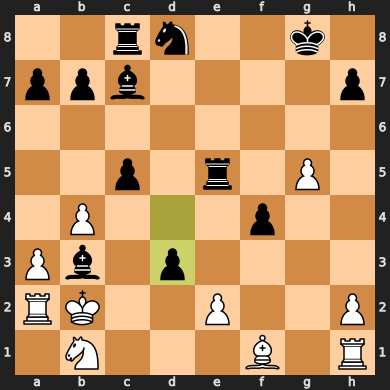

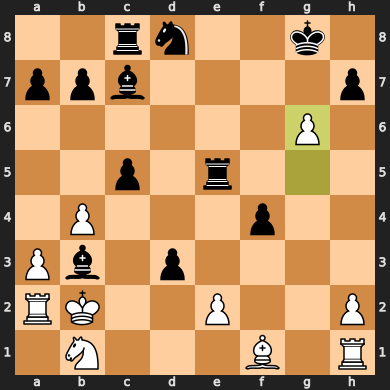

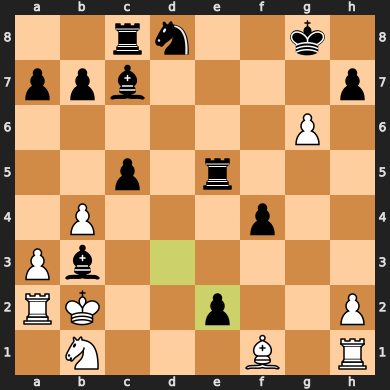

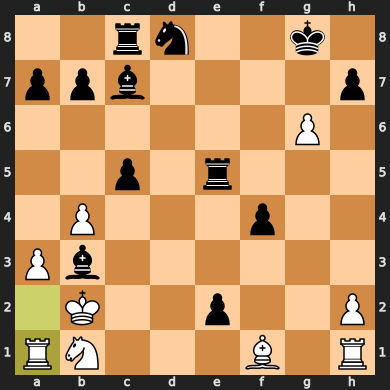

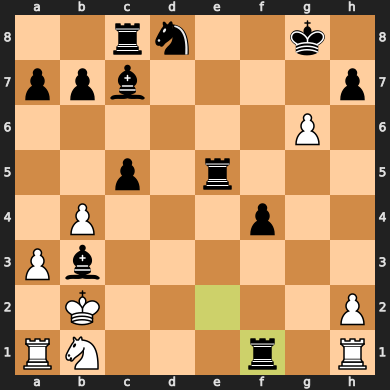

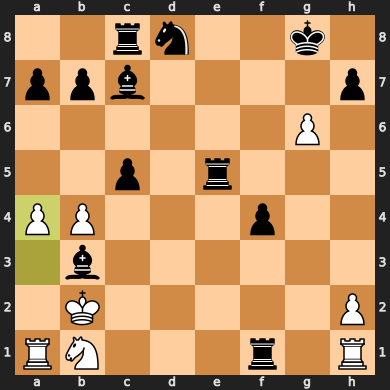

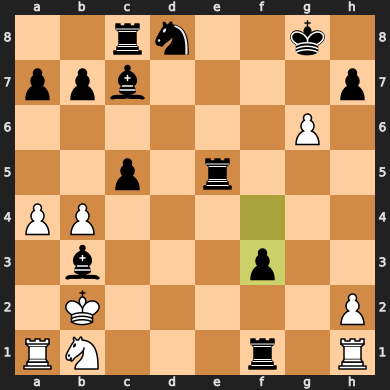

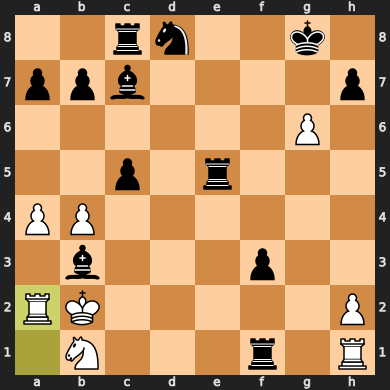

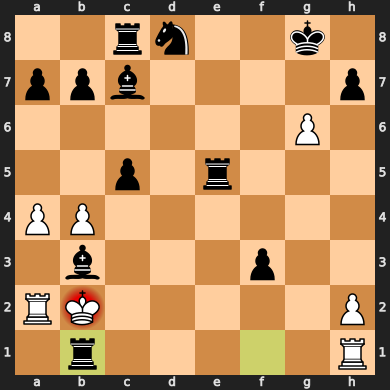

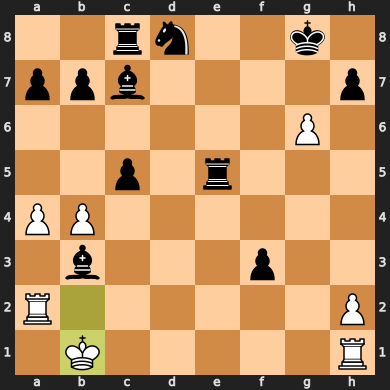

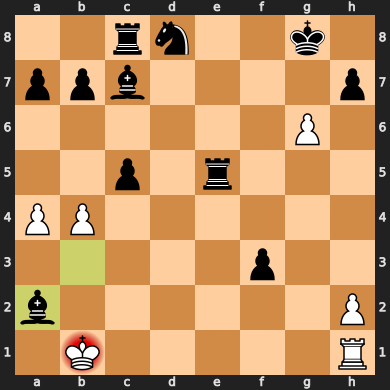

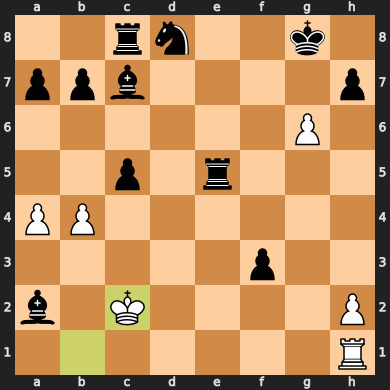

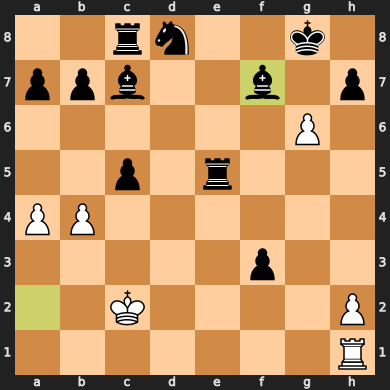

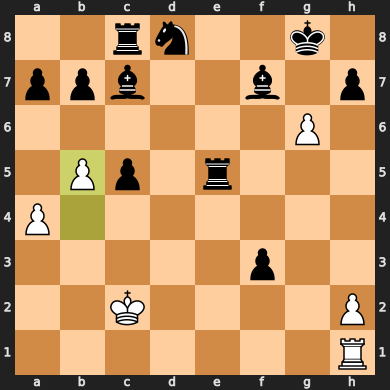

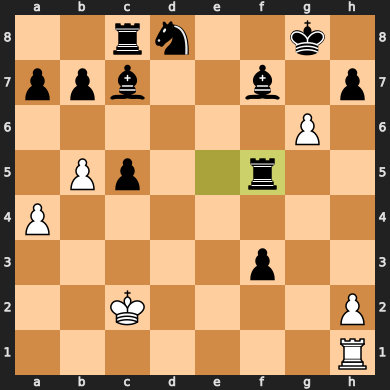

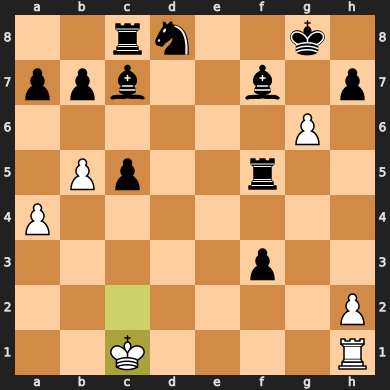

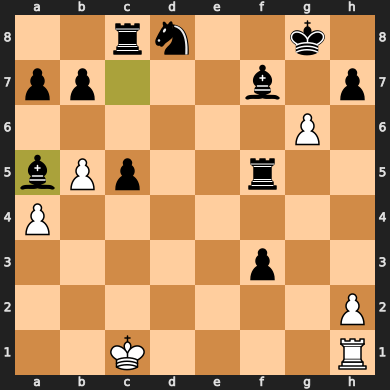

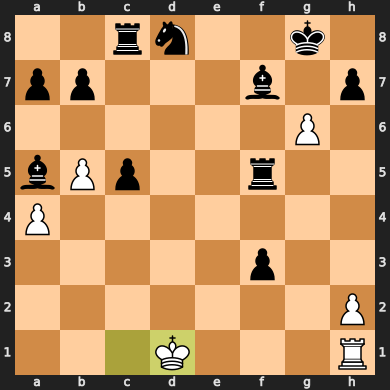

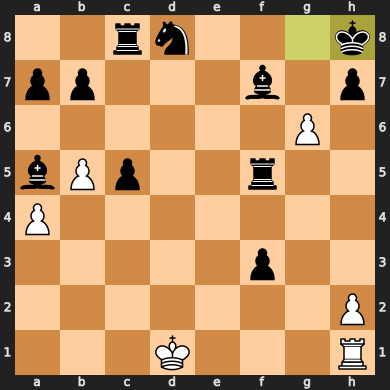

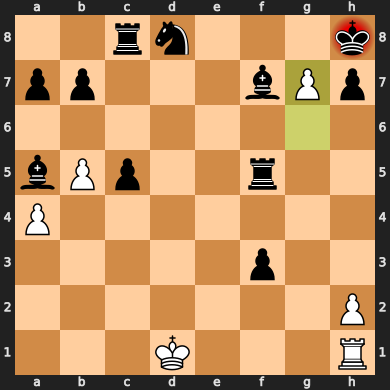

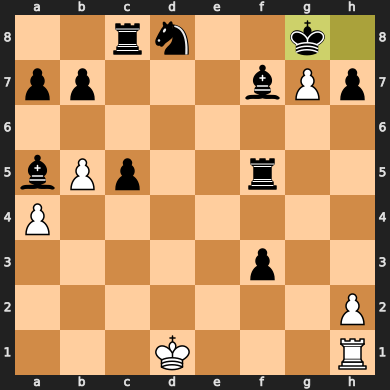

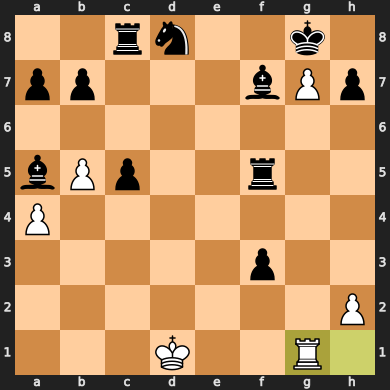

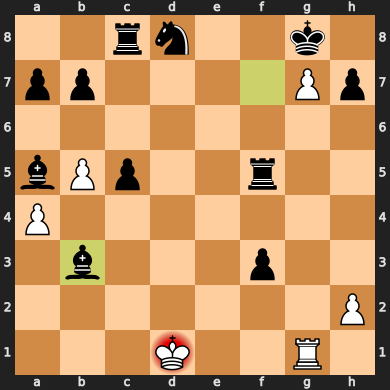

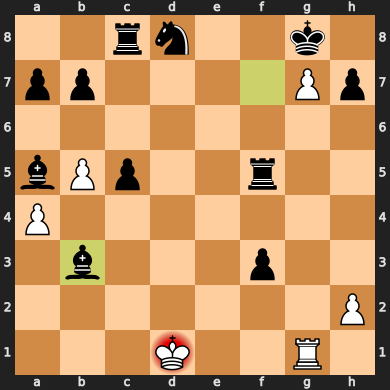

In [26]:
random_agent = RandomAgent()
agent = MinimaxAgent(model, 1, decay=1, min_coef=1)
play_game(random_agent, agent, verbose=True, n_moves=40)